Activity: Titanic Survival Predictions Interpretation using Shap Values

1. Load the Titanic dataset into your Python environment. (use train then test)
2. Perform necessary data preprocessing steps, including handling missing values and encoding categorical variables.
3. Choose a machine learning model and train it on the preprocessed Titanic dataset.
4. Calculate Shap values for the trained model using the SHAP library.
5. Select a specific instance (index) from the dataset for interpretation and explain how Shap values help in interpreting the prediction for that instance.
6. Visualize the Shap values for the selected instance and interpret the plot, highlighting feature contributions.
7. Summarize the significance of Shap values in interpreting machine learning models' predictions, particularly in the context of the Titanic survival predictions.

In [60]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [61]:
dataset = pd.read_csv('train.csv')
dataset.dropna(inplace=True)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [62]:
drop_columns = ['PassengerId','Name','Ticket','Cabin','Embarked']
X = dataset.drop(drop_columns, axis=1)
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,1,female,38.0,1,0,71.2833
3,1,1,female,35.0,1,0,53.1000
6,0,1,male,54.0,0,0,51.8625
10,1,3,female,4.0,1,1,16.7000
11,1,1,female,58.0,0,0,26.5500
...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542
872,0,1,male,33.0,0,0,5.0000
879,1,1,female,56.0,0,1,83.1583
887,1,1,female,19.0,0,0,30.0000


In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    , 51.8625],
       ...,
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  1.    , 83.1583],
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ]])

In [64]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the "Embarked" column
le.fit(dataset['Embarked'])

# Transform the "Embarked" column using the fitted encoder
dataset['Embarked'] = le.transform(dataset['Embarked'])
y = dataset['Embarked']
y

1      0
3      2
6      2
10     2
11     2
      ..
871    2
872    2
879    0
887    2
889    0
Name: Embarked, Length: 183, dtype: int32

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

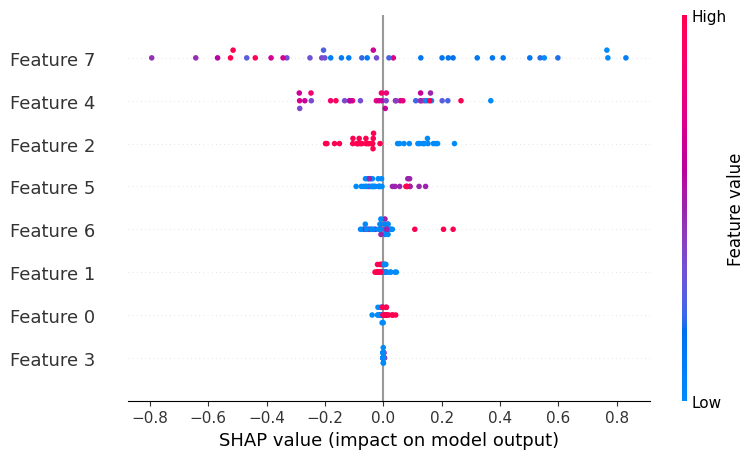

In [67]:
shap.summary_plot(shap_values, X_test)

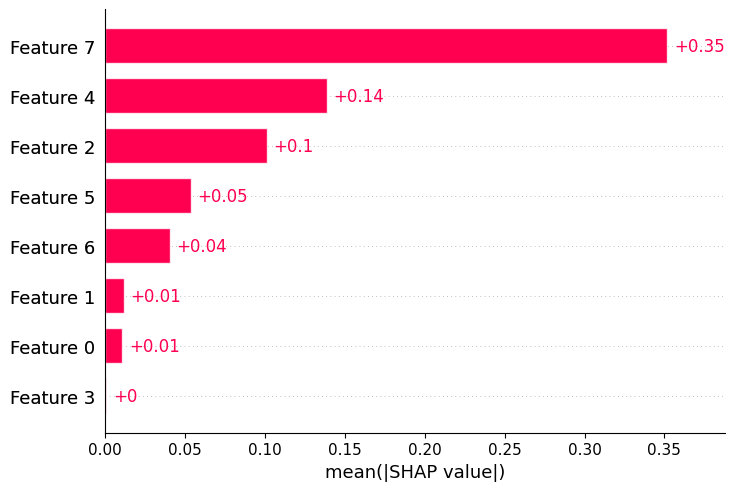

In [68]:
shap.plots.bar(shap_values)

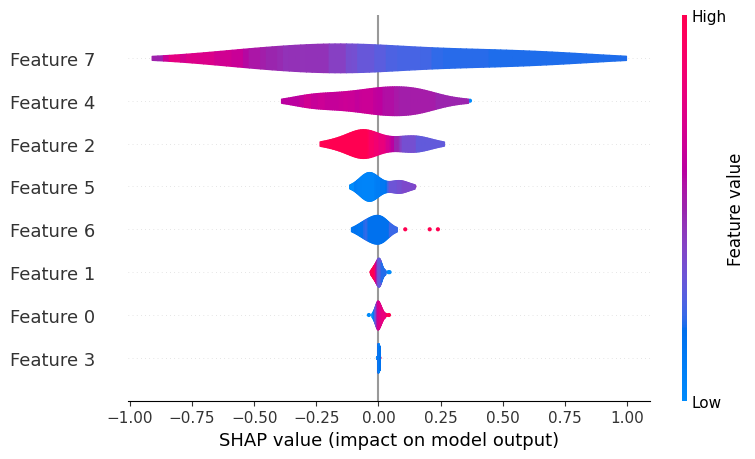

In [69]:
shap.summary_plot(shap_values, plot_type='violin')